# Lista de Exercícios VIII

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 17/11/2020

In [1]:
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt
from scipy import zeros
import vpython as vp 
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>

## Problema 1

Como de costume, definimos uma função para melhorar um pouco a estética do plot que virá logo em seguida:

In [2]:
def opt_plot():
    plt.grid()
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Agora definimos a função `banded(Aa,va,up,down)` presente no livro do Newman: 

In [3]:
def banded(Aa,va,up,down):
    # Copia as entradas e determina o tamanho do sistema
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Eliminação Gaussiana
    for m in range(N):

        # Fator normalizante
        div = A[up,m]

        # Primeiro, atualizamos o vetor 
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Agora normalizamos a linha do pivô de A e 
        # subtraimos das inferiores
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # "Backsubstitution"
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

Aqui cabe uma explicação sobre o que de fato a função `banded` que acabamos de definir faz. Nossa função tem como objetivo resolver um sistema em faixas de equações lineares usando o método da eliminação Gaussiana e substituição retroativa (*backsubstitution*).

Esta função retorna a solução vetorial $x$ da equação $A\cdot x=v$, onde $v$ é uma matriz que representa um vetor de $N$ elementos, reais ou complexos, e $A$ é uma matriz com bandas $N$ por $N$ com "para cima" elementos acima da diagonal diferentes de zero e elementos diferentes de zero "para baixo" abaixo da diagonal. A matriz é especificada como uma matriz bidimensional de (1 + para cima + para baixo) por $N$ elementos com as diagonais da matriz original ao longo de suas linhas, assim:

$$\begin{gather} \begin{pmatrix} - & - & A_{02} & A_{13} & A_{24} & \ldots \\ - & A_{01} & A_{12} & A_{23} & A_{34} & \ldots \\ A_{00} & A_{11} & A_{22} & A_{33} & A_{44} & \ldots \\ A_{10} & A_{21} & A_{32} & A_{43} & A_{54} & \ldots \\ A_{20} & A_{31} & A_{42} & A_{53} & A_{64} & \ldots  \end{pmatrix} \end{gather}$$

Os elementos representados por travessões são ignorados - não importa o que esses elementos contêm. O tamanho do sistema é retirado do tamanho do vetor $v$. Se a matriz $A$ for maior do que $N\times N$, então os extras são ignorados. Se for menor, o programa produzirá um erro.

Agora, vamos definir algumas constantes que nos serão de extrema importância principalmente na hora de gerarmos a nossa animação:

In [4]:
N = 6
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega**2

Definimos então os valores iniciais dos arrays:

In [5]:
A = np.empty([3,N],float)
A[0,:] = -k
A[1,:] = alpha
A[2,:] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k
v = np.zeros(N,float)
v[0] = C

Agora resolvemos a nossa equação:

In [6]:
x = banded(A,v,1,1)
print('x =',x)

x = [-0.01866883 -0.17288961 -0.21185065 -0.10957792  0.06574675  0.19724026]


Agora plotamos o nosso resultado:

<IPython.core.display.Javascript object>


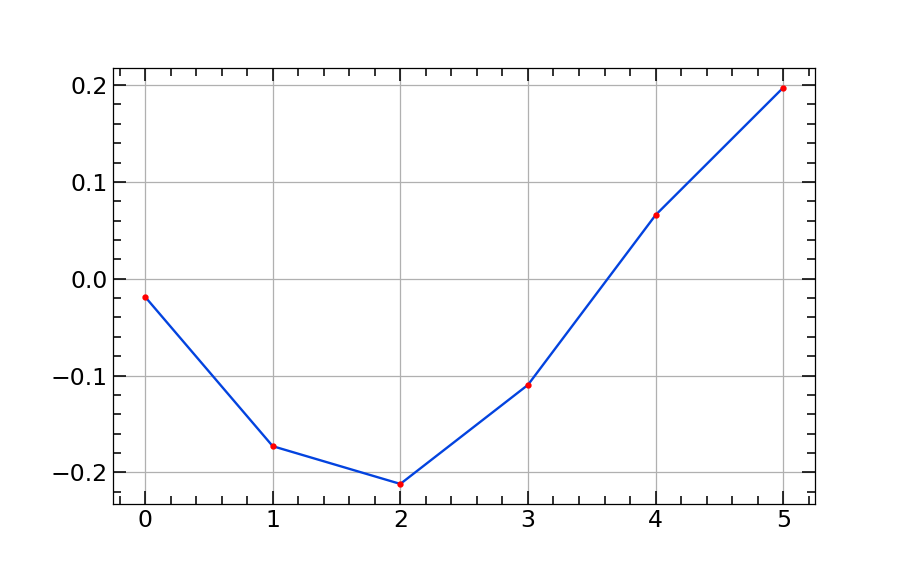

In [7]:
plt.figure(figsize=(8,5))

plt.plot(x,color='xkcd:blue')
plt.plot(x,'r.')
opt_plot()

$\text{ }$

Finalmente, vamos gerar a animação envolvendo as $N$ massas acopladas umas as outras por meio de molas. Para isso, vamos definir uma classe que chamaremos de `mass`:

In [ ]:
class mass:
    def __init__(self, position):
        self.body = vp.sphere(radius=0.1, pos=position, canvas=scene)
        self.position = position
    
    def vibrate(self,index, omega, time):
            new_position = vp.vector(x[index] *np.cos(omega * time), 0,0)
            self.body.pos = self.body.pos + new_position
            
caption = """Esta animação é uma representação de um conjunto de N massas idênticas em uma reta horizontal,
unidas por molas lineares idênticas.
"""
scene = vp.canvas(title="Vibração em um sistema unidimensional", fontsize=10, caption= caption)
scene.select()


# Estágio de Renderização:

initial_time = 0
x *= 10 # Multiplicamos por 10 para aumentar a escala da animação
mass_0 = mass(vp.vector(x[0]*np.cos(omega*initial_time),0,0))
mass_1 = mass(vp.vector(x[1]*np.cos(omega*initial_time),0,0))
mass_2 = mass(vp.vector(x[2]*np.cos(omega*initial_time),0,0))
mass_3 = mass(vp.vector(x[3]*np.cos(omega*initial_time),0,0))
mass_4 = mass(vp.vector(x[4]*np.cos(omega*initial_time),0,0))
mass_5 = mass(vp.vector(x[5]*np.cos(omega*initial_time),0,0))


# Estágio de Animação:

for time in np.arange(0,200,.1):
    vp.rate(10)
    mass_0.vibrate(0,omega, time)
    mass_1.vibrate(1,omega, time) 
    mass_2.vibrate(2,omega, time)
    mass_3.vibrate(3,omega, time)
    mass_4.vibrate(4,omega, time) 
    mass_5.vibrate(5,omega, time)

Obviamente, como a animação está sendo gerada num `Notebook`, a animação não irá rodar e se tornará estática com relação ao primeiro frame. Para contornar este problema, seguirá em anexo com este arquivo .ipynb um arquivo na extensão .py intitulado `Masses_on_spring.py` que executará a animação em um host local do seu navegador. O código pode ser acessando clicando [aqui](https://github.com/GabrielWendell/Fisica-Computacional-I/blob/main/Resolu%C3%A7%C3%B5es/Programas%20auxiliares/Masses_on_spring.py).

$\text{ }$

## Problema 2

### Letra a)

Vamos aplicar as leis de Kirchoff na cadeia de resistores que nos é apresentada na questão. Podemos então escrever:

$$\frac{V_{1}-V_{+}}{R}+\frac{V_{1}-V_{2}}{R}+\frac{V_{1}-V_{3}}{R}=0\Longleftrightarrow 3V_{1}-V_{2}-V_{3}=V_{+}$$

$$\frac{V_{2}-V_{+}}{R}+\frac{V_{2}-V_{1}}{R}+\frac{V_{2}-V_{3}}{R}+\frac{V_{2}-V_{4}}{R}=0\Longleftrightarrow4V_{2}-V_{1}-V_{3}-V_{4}=V_{+}$$

$$\frac{V_{3}-V_{1}}{R}+\frac{V_{3}-V_{2}}{R}+\frac{V_{3}-V_{4}}{R}+\frac{V_{3}-V_{5}}{R}=0\Longleftrightarrow4V_{3}-V_{1}-V_{2}-V_{4}-V_{5}=0$$

$$\vdots$$

$$\frac{V_{i}-V_{i-2}}{R}+\frac{V_{i}-V_{i-1}}{R}+\frac{V_{i}-V_{i+1}}{R}+\frac{V_{i}-V_{i+2}}{R}=0\Longleftrightarrow$$

$$\Longleftrightarrow4V_{i}-V_{i-2}-V_{i-1}-V_{i+1}-V_{i+1}=0$$

$$\vdots$$

$$\frac{V_{N-1}-V_{N-2}}{R}+\frac{V_{N-1}-V_{N}}{R}+\frac{V_{N-1}-V_{N-3}}{R}+\frac{V_{N-1}-0}{R}=0\Longleftrightarrow$$

$$\Longleftrightarrow4V_{N-1}-V_{N-3}-V_{N-2}-V_{N}=0$$

$$\frac{V_{N}-V_{N-2}}{R}+\frac{V_{N}-V_{N-1}}{R}+\frac{V_{N}-0}{R}=0\Longleftrightarrow3V_{N}-V_{N-2}-V_{N-1}=0$$

$\blacksquare$

Agora vamos escrever o nosso sistema acima na forma matricial, ou seja, na forma $\textbf{Av}=\textbf{w}$:

$$\begin{gather} \begin{pmatrix} 3 & -1 & -1 & 0 & 0 & 0\\ -1 & 4 & -1 & -1 & 0 & 0\\ -1 & -1 & 4 & -1 & -1 & 0\\ 0 & -1 & -1 & 4 & -1 & -1\\ 0 & 0 & -1 & -1 & 4 & -1\\ 0 & 0 & 0 & -1 & -1 & 3 \end{pmatrix} \begin{pmatrix} V_1\\ V_2\\ V_3\\ V_4\\ V_5\\ V_6 \end{pmatrix} = \begin{pmatrix} V_+\\ V_+\\ 0\\ 0\\ 0\\ 0 \end{pmatrix} \end{gather}$$

$\blacksquare$

Note que nossa matriz quadrada terá dimensão $N=6$.

### Letra b)

Desejamos determinar os valores de $V_{i}$ quando temos um número $N=6$ junções internas com voltagens desconhecidas. Primeiramente, vamos definir algumas constantes:

In [8]:
v_plus=5
N=6

Agora definimos a nossa matriz quadrada `À` e o nosso vetor coluna `v`:

In [9]:
A = np.zeros([N , N] , dtype = float)
v = np.array([v_plus , v_plus , 0 , 0 , 0 , 0], dtype = float)

for row in range (1 , N-1):
    A[row,row] = 4
for row in range (N-1):
    A[row,row+1] = -1
    A[row+1,row] = -1
for row in range (N-2):
    A[row,row+2] = -1
    A[row+2,row] = -1
    
A[0,0] , A[N-1,N-1] = 3 , 3

Agora vamos printar a nossa matriz `A` para verificar se seus valores estão corretos:

In [10]:
print(' A =\n' , A ,'\n\n', 'v =', v)

 A =
 [[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]] 

 v = [5. 5. 0. 0. 0. 0.]


Agora implementamos a eliminação Gaussiana:

In [11]:
# Para a primeira linha:
div = A[0,0]
A[0,:3] /= div
v[0] /= div

mult = A[1,0]
A[1,:4] -= mult*A[0,:4]
v[1] -= mult*v[0]

mult = A[2,0]
A[2,:5] -= mult*A[0,:5]
v[2] -= mult*v[0]

# Para a segunda linha:
div = A[1,1]
A[1,:4] /= div
v[1] /= div

mult = A[2,1]
A[2,1:5] -= mult*A[1,1:5]
v[2] -= mult*v[1]

mult = A[3,1]
A[3,1:6] -= mult*A[1,1:6]
v[3] -= mult*v[1]

# Para as terceira e quarta linhas:
for row in range (2,4):
    div = A[row,row]
    A[row,:row+3] /= div
    v[row] /= div
    
    for i in range (row+1,row+3):
        mult = A[i,row]
        A[i,i-2:i+3] -= mult*A[row,i-2:i+3]
        v[i] -= mult*v[row]
        
        
# Para a quinta linha:
div = A[4,4]
A[4,:] /= div
v[4] /= div

mult = A[5,4]
A[5,:] -= mult*A[4,:]
v[5] -= mult*v[4]

# Para a sexta linha:
A[N-1,N-1] /= A[N-1,N-1]
v[N-1] /= A[N-1,N-1]

Agora definimos `x` e em seguida o printamos:

In [12]:
x = np.empty (N , dtype = float)

x[N-1] = v[N-1]
x[N-2] = v[N-2] - A[N-2,N-1]*v[N-1]
for row in range (N-2):
    x[row] = v[row] - A[row,row+1]*v[row+1] - A[row,row+2]*v[row+2]
    
print(x)

[2.7012987  2.59563164 2.07383933 2.37683723 2.1700312  2.52994012]


**OBS:** Eu resolvi as equações à mão e cheguei aos cálculos que foram apresentados nas células anteriores. Uma dúvida que me surgiu é se eu deveria ter usado o *backsubstituition*, uma vez que ao meu ver, creio ter resolvido bem o método de Gauss para uma matriz com cinco diagonais...

In [13]:
A = np.zeros ([N , N] , dtype = float)
v = np.array ([v_plus , v_plus , 0 , 0 , 0 , 0] , dtype = float)

for row in range (1 , N-1):
    A[row,row] = 4
for row in range (N-1):
    A[row,row+1] = -1
    A[row+1,row] = -1
for row in range (N-2):
    A[row,row+2] = -1
    A[row+2,row] = -1
    
A[0,0] , A[N-1,N-1] = 3 , 3

print(np.linalg.solve (A,v))

[3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]


### Letra c)

Agora vamos repetir os cálculos para quando $N=10000$. Analogamente ao item anterior, definimos nossas constantes:

In [14]:
N = 10000
V_pos = 5 

Agora criamos a nossa matriz unida (*banded matrix*):

In [15]:
A = np.zeros([5, N], float)

A[2, 0] = A[2, N-1] = 3
for i in range(2, N):
    A[0, i] = -1

for i in range(1, N):
    A[1, i] = -1

for i in range(1, N-1):
    A[2, i] = 4

for i in range(N-1):
    A[3, i] = -1

for i in range(N-2):
    A[4, i] = -1

Agora criamos o vetor RHS:

In [16]:
b = np.zeros(N)
b[0] = b[1] = V_pos

Resolvemos o nosso sistema de equações usando a função `solve_banded()` do SciPy:

In [17]:
x = solve_banded((2,2), A, b)

Por fim, vamos plotar nosso resultado:

<IPython.core.display.Javascript object>


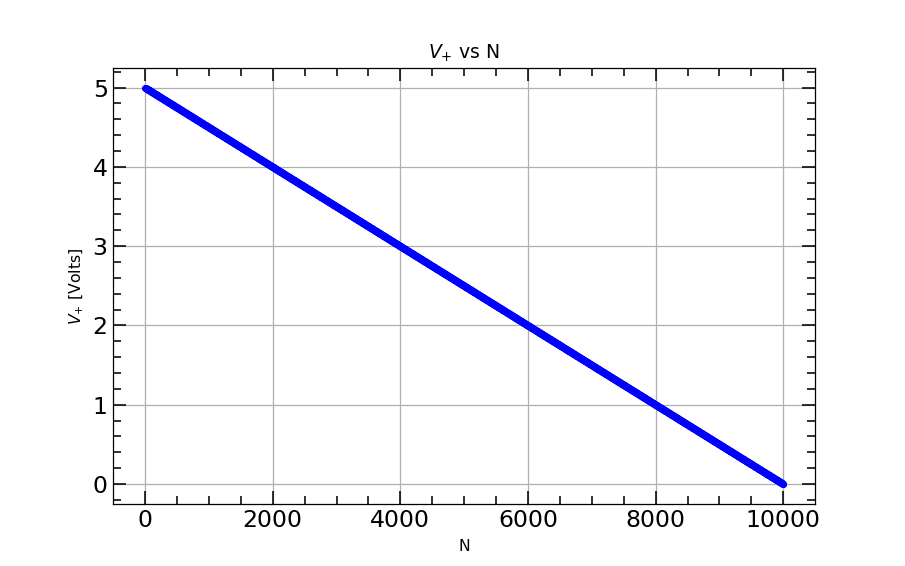

In [18]:
plt.figure(figsize=(8,5))

plt.plot(x, 'b.')
plt.title(r'$V_{+}$ vs N')
plt.xlabel('N')
plt.ylabel(r'$V_{+}$ [Volts]')
opt_plot()

$\text{ }$

## Problema 3

### Letra a)

Desejamos provar que $q_{i}\cdot q_{i}=1$. Para isso, basta olharmos para a definição de $q_{i}$:

$$q_{i}\cdot q_{i}=\frac{u_{i}}{|u_{i}|}\cdot\frac{u_{i}}{|u_{i}|}=\frac{1}{|u_{i}|^{2}}(u_{i}\cdot u_{i})=\frac{1}{|u_{i}|^{2}}|u_{i}|^{2}=1$$

Para provarmos que $q_{i}\cdot q_{j}=0$ para todo $i\neq j$, precisamos provar que $u_{i}\cdot u_{j}=0$, logo:

$$0=u_{i}\cdot u_{j}=u_{i}\cdot\frac{u_{j}}{|u_{j}|}=u_{i}\cdot q_{j}\implies$$

$$u_{i}\cdot q_{j}=a_{i}\cdot q_{j}-\sum(q_{j}\cdot a_{i})q_{j}\cdot q_{j}\implies$$

$$\boxed{a_{i}\cdot q_{j}-\sum(q_{j}\cdot a_{i})=0}$$

$\blacksquare$

### Letra b)

Vamos criar uma função chamada `QR_decomp(A)` que irá implementar a decomposição QR:

In [19]:
def QR_decomp(A):
    N = len(A)
    
    Q = np.zeros([N,N] , dtype=float) # Matriz ortogonal
    R = np.zeros([N,N] , dtype=float) # Matriz triangular superior (A = QR)


    for col in range (N):
        u = np.copy (A[:,col])
        for i in range (col):
            u -= np.dot(Q[:,i] , A[:,col]) * Q[:,i]
        Q[:,col] = u / np.linalg.norm(u)
        
    for row in range (N):
        for col in range (row , N):
            R[row,col] = np.dot (Q[:,row] , A[:,col])
               
    return Q,R

Agora definimos a nossa matriz `A`:

In [20]:
A = np.array([[1,4,8,4],
              [4,2,3,7],
              [8,3,6,9],
              [4,7,9,2]] , dtype=float)

Q,R = QR_decomp(A)
print (' Q = ', '\n' , Q , '\n\n' , 'R = ', '\n' , R ,'\n\n' , 'A = ', '\n' , np.matmul(Q,R))

 Q =  
 [[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]] 

 R =  
 [[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]] 

 A =  
 [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]


Definimos agora uma função para testar a precisão do nosso método. Chamaremos nossa função de `accuracy_test(eps,M)`, ela irá retornar `True` se os elementos fora da diagonal da matriz `M` forem inferiores ao `eps` e `False` se não forem.

In [21]:
def accuracy_test (epsilon , M):
    N = len(M)
    
    for row in range (N):
        for col in range (N):
            if row == col:
                continue
            else:
                if abs(M[row,col]) >= epsilon:
                    return False
    return True

Agora implementamos o algoritmo QR de fato:

In [22]:
def QR_algorithm (A , epsilon):
    N = len(A)
    
    # Esta matriz conterá os autovetores de A. 
    # Ela começa como a matriz de identidade:
    V = np.eye (N , dtype=float)
    
    while accuracy_test (epsilon , A) == False:
        Q , R = QR_decomp (A)
        A = np.matmul (R,Q)
        V = np.matmul (V,Q)
    
    eigenvals = np.zeros (N , dtype=float)
    for row in range (N):
        eigenvals[row] = A[row,row]
    
    return eigenvals,V

Finalmente, printamos os autovalores e autovetores desejados:

In [23]:
A = np.array ([[1,4,8,4],
              [4,2,3,7],
              [8,3,6,9],
              [4,7,9,2]] , dtype=float)

eigenval , eigenvec = QR_algorithm (A , 1e-6)
print(' Autovalores = ', eigenval, '\n\n', 'Autovetores = \n', eigenvec)

 Autovalores =  [21. -8. -3.  1.] 

 Autovetores = 
 [[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]


$\blacksquare$